#**Wine Quality DATASET(Prediction Of Alcohol Percentages In Wine)**

Attribute information:

    For more information, read [Cortez et al., 2009].

        Input variables (based on physicochemical tests):                
        1 - fixed acidity (tartaric acid - g / dm^3)                      
        2 - volatile acidity (acetic acid - g / dm^3)            
        3 - citric acid (g / dm^3)                        
        4 - residual sugar (g / dm^3)            
        5 - chlorides (sodium chloride - g / dm^3                 
        6 - free sulfur dioxide (mg / dm^3)                 
        7 - total sulfur dioxide (mg / dm^3)                      
        8 - density (g / cm^3)                   
        9 - pH                                      
        10 - sulphates (potassium sulphate - g / dm3)               
        11 - quality (score between 0 and 10)                                
        
        Output variable (based on sensory data):                   
        12 - alcohol (% by volume)                                  

Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - quality (score between 0 and 10)                       
-> **Output variable (based on sensory data):**                      
12 - alcohol: the percent alcohol content of the wine

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
wine_data = pd.read_csv('wineQualityReds.csv',index_col='Unnamed: 0')
wine_data.head()

In [ ]:
wine_data.columns

In [ ]:
wine_data.info()

In [ ]:
wine_data.describe()

In [ ]:
sns.boxplot(data=wine_data)

In [ ]:
wine_data.hist(figsize=(18,15));

In [ ]:
#count plot of quality variable:
sns.countplot(x='quality',data=wine_data)

In [ ]:
#PairPlot
sns.pairplot(wine_data)

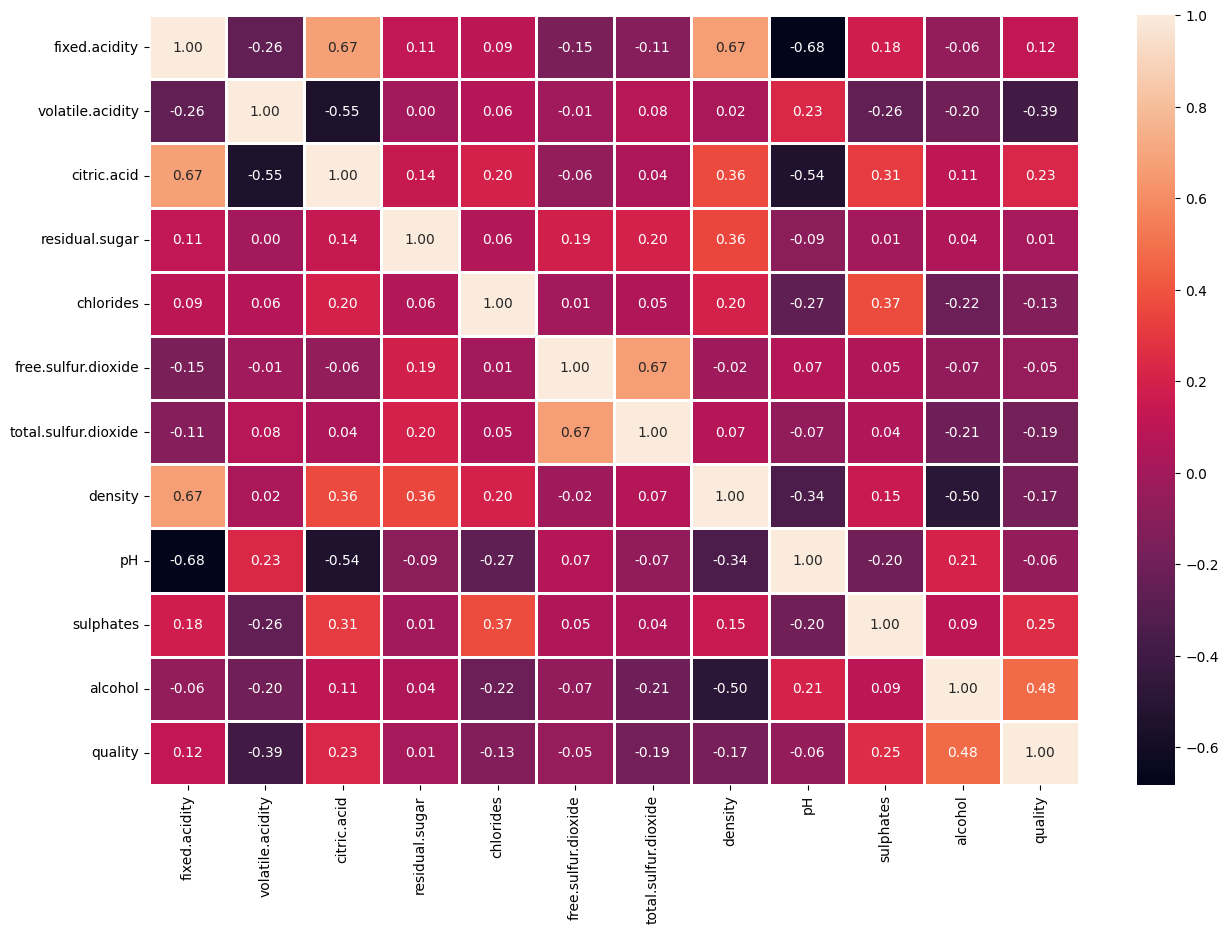

In [ ]:
#Correlation between features
plt.figure(figsize=(15,10))
sns.heatmap(wine_data.corr(), annot=True, fmt='.2f', linewidths=2)

<ipython-input-11-16be6c3f6d44>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_data['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

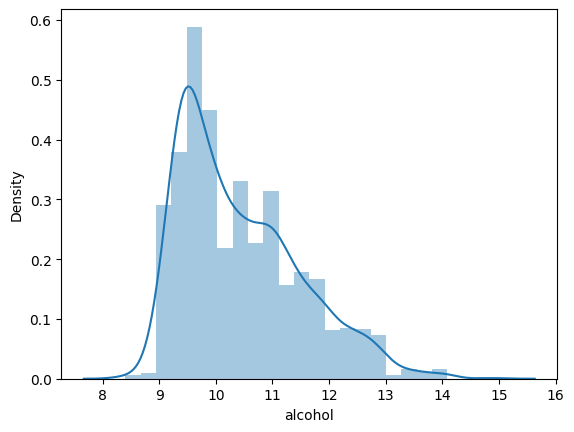

In [ ]:
# Lets see how alcohol concentration is distributed
#with respect to the quality of the red wine.
sns.distplot(wine_data['alcohol'])

<Axes: xlabel='quality', ylabel='alcohol'>

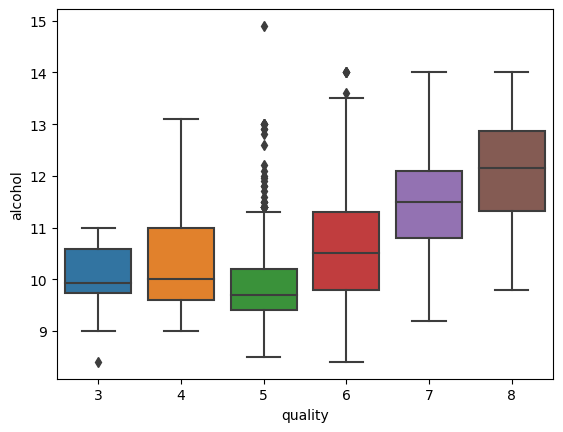

In [ ]:
#Alcohol Vs Quality:
sns.boxplot(x='quality', y='alcohol', data = wine_data)

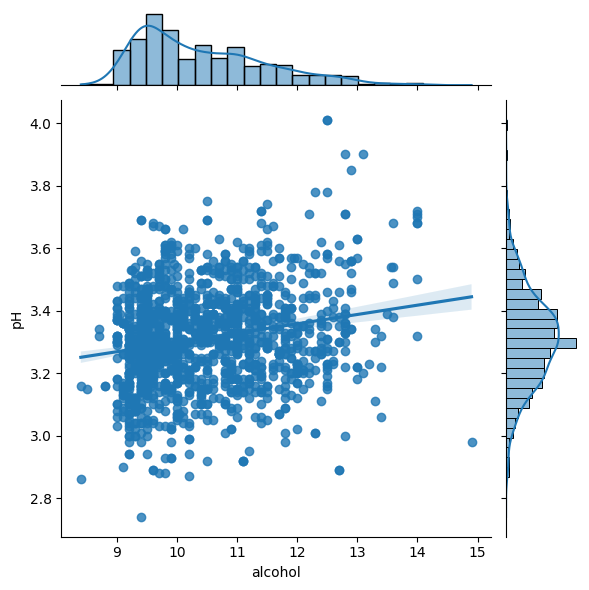

In [15]:
#ALcohol vs pH
sns.jointplot(x='alcohol',y='pH',data=wine_data, kind='reg')

* **This Figure shows that alcohol is weakly positively related to the pH values. Moreover, the regression line is depicted in the figure, illustrating the correlation between them.**

#Seperate Independant and Dependent Data

In [16]:
X = wine_data.drop('alcohol',axis=1)
X[:5]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5


In [17]:
y = wine_data.alcohol
y[:5]

1    9.4
2    9.8
3    9.8
4    9.8
5    9.4
Name: alcohol, dtype: float64

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [19]:
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [20]:
y_pred = svr.predict(X_test)
y_pred[:5]

array([ 9.99522812,  9.63826602, 10.59479161, 10.31646818, 10.5616837 ])

In [21]:
y_test[:5]

804      9.6
125      9.5
351      9.9
683      9.8
1327    10.6
Name: alcohol, dtype: float64

In [22]:
print('Training score:',svr.score(X_train,y_train)*100)
print('Testing score:',svr.score(X_test,y_test)*100)

Training score: 15.583897386632994
Testing score: 9.727675988100582


In [23]:
# lets scale X_train and X_test
sc = StandardScaler()
X_scaled_train = sc.fit_transform(X_train)
X_scaled_test = sc.transform(X_test)

In [24]:
svr1 = SVR()
svr1.fit(X_scaled_train,y_train)

SVR()

In [25]:
# after scaling
print('Training score:',svr1.score(X_scaled_train,y_train)*100)
print('Testing score:',svr1.score(X_scaled_test,y_test)*100)

Training score: 84.10795258987518
Testing score: 80.79806797944859


In [27]:
X_new = sc.transform(X)
X_new[:1]

array([[-0.5359173 ,  0.94551397, -1.39462955, -0.45670298, -0.25242785,
        -0.47296984, -0.38437616,  0.55304636,  1.28836145, -0.57308093,
        -0.77353113]])

In [28]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_new,y,test_size=.2,random_state=42)

In [29]:
svr2 = SVR()
svr2.fit(X_train1,y_train1)

SVR()

In [32]:
pred = svr2.predict(X_test1)
pred[:5]

array([ 9.60631078,  9.70578295, 10.72360292,  9.34500738, 10.61164687])

In [33]:
y_test1[:5]

804      9.6
125      9.5
351      9.9
683      9.8
1327    10.6
Name: alcohol, dtype: float64

In [38]:
mse = mean_squared_error(y_test1, pred)*100
r2 = r2_score(y_test1,pred)*100

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 23.90502522672254
R-squared (R2): 80.79806797944859


In [35]:
svr2 = SVR()

In [39]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

In [40]:
grid_search = GridSearchCV(svr2, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train1, y_train1)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=1)

In [41]:
grid_search.best_params_

{'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}

In [42]:
best_SVR = SVR(kernel='rbf',C=1,epsilon=0.1)
best_SVR.fit(X_train1,y_train1)

SVR(C=1)

In [43]:
y_pred1= best_SVR.predict(X_test1)
y_pred1[:5]

array([ 9.60631078,  9.70578295, 10.72360292,  9.34500738, 10.61164687])

In [44]:
y_test1[:5]

804      9.6
125      9.5
351      9.9
683      9.8
1327    10.6
Name: alcohol, dtype: float64

In [47]:
print('Training score:',best_SVR.score(X_train1,y_train1)*100)
print('Testing score:',best_SVR.score(X_test1,y_test1)*100)

Training score: 84.10795258987518
Testing score: 80.79806797944859


In [46]:
mse = mean_squared_error(y_test1,y_pred1)*100
r2 = r2_score(y_test1,y_pred1)*100

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 23.90502522672254
R-squared (R2): 80.79806797944859
